# Exam Project | Face Recognizer
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [16]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [17]:
import sys
sys.path.append('../')
from FaceDetector import FaceDetector
from DataGenerator import DataGenerator
from Utilities import Displayer

In [18]:
classes = ['dad', 'mom']
dad_path = '../data/face-data/PersonGroup/Family3-Man'
mom_path = '../data/face-data/PersonGroup/Family3-Lady'

(train_dad_data, test_dad_data) = DataGenerator.generate(dad_path, 150, label=0, test_size=.2)
(train_mom_data, test_mom_data) = DataGenerator.generate(mom_path, 150, label=1, test_size=.2)

(train_images, train_labels) = DataGenerator.merge_shuffle([train_dad_data, train_mom_data])
(test_images, test_labels) = DataGenerator.merge_shuffle([test_dad_data, test_mom_data])

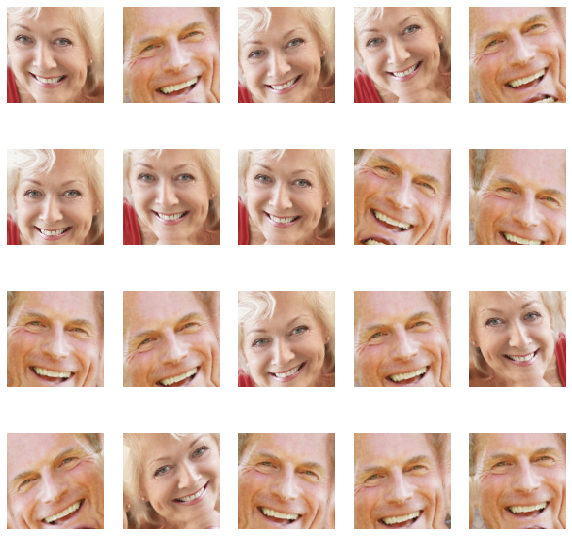

In [19]:
Displayer.images(test_images, 20)

In [20]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    Dropout(.2),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'), # softmax no go
    Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

In [21]:
loss_func = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Train on 720 samples, validate on 180 samples
Epoch 1/15
720/720 [==============================] - 33s 46ms/sample - loss: 0.8450 - accuracy: 0.4986 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 2/15
720/720 [==============================] - 33s 45ms/sample - loss: 0.6843 - accuracy: 0.5361 - val_loss: 0.6756 - val_accuracy: 0.8778
Epoch 3/15
720/720 [==============================] - 26s 36ms/sample - loss: 0.6512 - accuracy: 0.6861 - val_loss: 0.6752 - val_accuracy: 0.7833
Epoch 4/15
720/720 [==============================] - 29s 40ms/sample - loss: 0.5666 - accuracy: 0.6861 - val_loss: 0.6526 - val_accuracy: 0.5000
Epoch 5/15
720/720 [==============================] - 21s 29ms/sample - loss: 0.4539 - accuracy: 0.7500 - val_loss: 1.1243 - val_accuracy: 0.5000
Epoch 6/15
720/720 [==============================] - 23s 32ms/sample - loss: 0.2824 - accuracy: 0.8819 - val_loss: 0.1485 - val_accuracy: 0.9778
Epoch 7/15
720/720 [==============================] - 24s 33ms/sample - loss: 

180/1 - 1s - loss: 0.0154 - accuracy: 0.9944


[0.01992697248028384, 0.99444443]

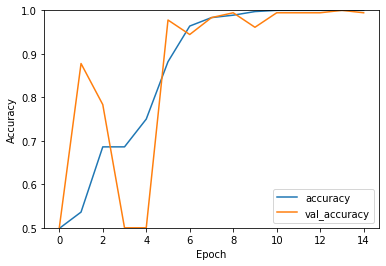

In [23]:
Displayer.acc_history(history)
model.evaluate(test_images, test_labels, verbose=2)

In [24]:
# model.save('../models/sequential_model_acc96.h5')
# model = tf.keras.models.load_model('../models/sequential_model.h5')

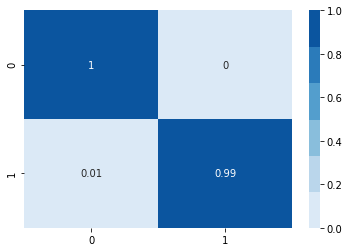

In [25]:
# ...
predictions = model.predict(test_images)
Displayer.conf_matrix(predictions, test_labels)

predictions [[-3.3481312  2.024092 ]]
prediction mom


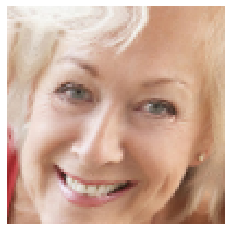

In [26]:
image_index = 30
image = np.array([test_images[image_index]], dtype='float32')

predictions = model.predict(image)
prediction = np.argmax(predictions)

print('predictions', predictions)
print('prediction', classes[prediction])
Displayer.image(test_images[image_index])

___

In [27]:
image_path = '../data/face-data/identification3.jpg'
test_image = cv2.imread(image_path)

faceDetector = FaceDetector('FACE_DEFAULT')
new_test_images = faceDetector.crop_all(test_image)

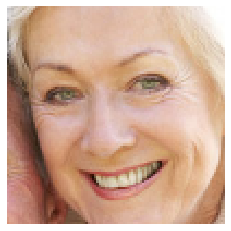

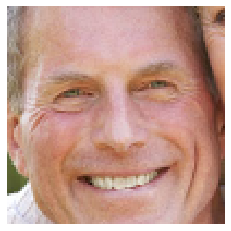

In [31]:
for image in new_test_images:
    Displayer.image(image, bgr=True)

In [32]:
images = np.array(new_test_images, dtype=np.float32) 
images = np.array([image/255 for image in images], dtype=np.float32)

In [33]:
predictions = model.predict(np.array([images[1]]))
print(predictions)

[[-4.2342734  1.7001716]]
